[In the last post](https://bkoseoglu.github.io/linear/algebra/2021/09/30/matrices-as-linear-maps.html), we looked at how we can represent linear maps as matrices and how we can operate with them to do basic operations like scaling and transformation. In this post, we will look at a special set of vectors called eigenvectors that are defined for a matrix. These are special set of vectors in a sense that they characterize the matrix itself. They are central to many machine learning algorithms like [dimensionality reduction](https://en.wikipedia.org/wiki/Principal_component_analysis). We will then look at an application of eigenvectors which we use frequently in our lives, [PageRank algorithm](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf)!


## Basis Vectors 

In order to understand eigenvectors and their function in characterizing the matrices, we first need to understand what basis vectors are. [In the last post](https://bkoseoglu.github.io/linear/algebra/2021/09/30/matrices-as-linear-maps.html), we already saw that matrices represent linear transformations.
Let $\mathbf{A}$ represents a transformation, we can get the transformation by transformed standard unit vectors:

$$\mathbf{A}={\begin{bmatrix}f(\color{green}{\begin{bmatrix}1\\0\end{bmatrix}}) f(\color{red}{\begin{bmatrix}0\\1\end{bmatrix}})\end{bmatrix}}\\={\begin{bmatrix}\color{green}2&\color{red}0\\\color{green}0&\color{red}3\end{bmatrix}}$$

But why did we choose standard unit vectors $\color{green}{\begin{bmatrix}1\\0\end{bmatrix}}$, $\color{red}{\begin{bmatrix}0\\1\end{bmatrix}}$? The reason is that any vector can be written as combination of these two vectors, i.e these vectors span vector space $\mathbf{R^2}$.

$$\mathbf{v}=\sum\limits_{j=1}^{n}\lambda_j*\mathbf{u_{j}}$$


where $\lambda_j\in\mathbf{R}, \mathbf{v}\in\mathbf{R^2}$ and $\mathbf{u_{j}}$'s are basis vectors. An example $\begin{bmatrix}3\\4\end{bmatrix} = 3\color{green}{\begin{bmatrix}1\\0\end{bmatrix}} + 4\color{red}{\begin{bmatrix}0\\1\end{bmatrix}}$. Let's see it visually!




In [5]:
import sys
from IPython.display import HTML
from IPython.display import Image
sys.path.append('../../../scripts/')
from plot_helper import *


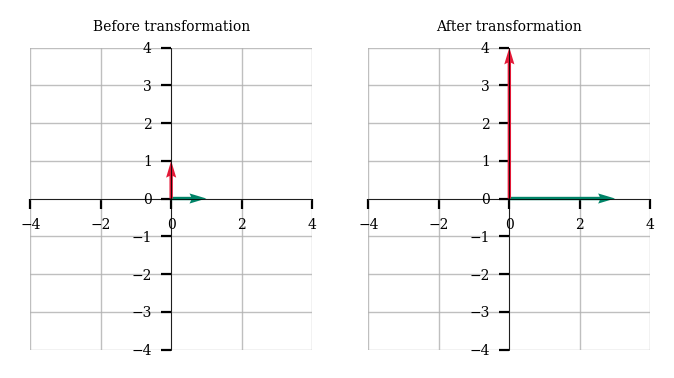

In [3]:
A = numpy.array([[3,0], [0,4]])
plot_linear_transformation(A)

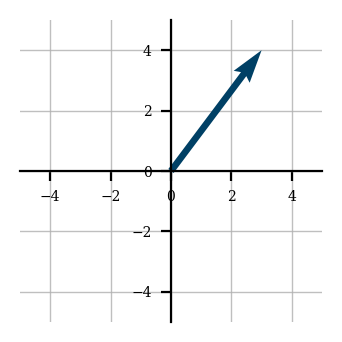

In [27]:
import numpy as np
vec = np.array([3,4])
plot_vector([vec])

Minimum number of vectors form a set which spans a vector space is called a basis. Standard unit vectors $\color{green}{\begin{bmatrix}1\\0\end{bmatrix}}$, $\color{red}{\begin{bmatrix}0\\1\end{bmatrix}}$ are an example of basis, another example is set of $\color{green}{\begin{bmatrix}1\\0\end{bmatrix}}$, $\color{red}{\begin{bmatrix}1\\1\end{bmatrix}}$. Key takeaway is that **there are multiple valid bases for vector spaces.**

## Transformation Based on Different Basis

Earlier we represented matrices as linear maps on how they transform standard unit vectors. By now we know that there can be multiple valid bases for a vector space. Using this information we can represent matrices based on they they transform any other basis.

$$\mathbf{A}={\begin{bmatrix}f(\color{green}{\begin{bmatrix}1\\0\end{bmatrix}}) f(\color{red}{\begin{bmatrix}0\\1\end{bmatrix}})\end{bmatrix}}\\\mathbf{A_b}={\begin{bmatrix}f(\color{green}{\begin{bmatrix}1\\0\end{bmatrix}})_b f(\color{red}{\begin{bmatrix}1\\1\end{bmatrix}})_b\end{bmatrix}}\\\mathbf{A_b}={\begin{bmatrix}f(\color{green}{\mathbf{b1}})&_b f(\color{red}{\mathbf{b2}})_b\end{bmatrix}}$$


## Power of Diagonals

The reason why we take a look at definition of basis and how matrices can be expressed in terms of different bases was to apply change of basis to a matrix. Change of basis is a methodology where we can make operations related to matrices easier. Let's say that we want to apply a matrix to a vector multiple times. That would be $$\mathbf{A}.\mathbf{A}.\mathbf{A}.\mathbf{A}.\mathbf{A}.\mathbf{v}$$. How can we implement such an operation? Well the answer is easy! If you consider the definition of matrix multiplication, we need to have a loop that traverses each element of the matrix and the vector multiple times. Okay we know how to implement such an operation but remember this loop can be quite expensive!

However imagine now that the same matrix can be expressed as follows ${\begin{bmatrix}\lambda_1&0\\0&\lambda_2\end{bmatrix}}$ where $\lambda_j\in\mathbf{R}$ j=1,2. Now the same operation above is as easy as taking exponents. $$\mathbf{A}.\mathbf{A}={\begin{bmatrix}\lambda_1^2&0\\0&\lambda_2^2\end{bmatrix}}$$. More generally, $$\mathbf{A}^n={\begin{bmatrix}\lambda_1^n&0\\0&\lambda_2^n\end{bmatrix}}$$. As you can see, this is rather an easier operation to perform. This form of a matrix is called *diagonal matrix*.


## Eigenvectors

We by now know that getting a matrix into diagonal form can be quite helpful. But then how can we do that? There are [ways](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) to do that but let's understand the process intiutively. We know that a matrix can be expressed in terms of how it transforms basis vectors. $$\mathbf{A_b}={\begin{bmatrix}f(\mathbf{b1})_b&f(\mathbf{b2})_b\end{bmatrix}}={\begin{bmatrix}\lambda_1&0\\0&\lambda_2\end{bmatrix}}$$ 

This implies:

- $f(b1)_b = \begin{bmatrix}\lambda_1\\0\end{bmatrix}_b=\lambda_1*b_1+0*b_2$
- $f(b2)_b = \begin{bmatrix}0\\\lambda_2\end{bmatrix}_b=0*b_1+\lambda_2*b_2$

where $b_1,b_2$ form a basis.

Then if we can find a basis that can satisfy the set of equations above, we can diagonalize the matrix. There are [ways](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) to calculate such vectors but calculating is not our main focus in this post. These vectors in fact are called **eigenvectors** of a matrix. They satisfy the following equation which follows the equations above: $$f(\mathbf{v})=\lambda*\mathbf{v} \\ or \\ \mathbf{A}*\mathbf{v}=\lambda*\mathbf{v}$$

Assuming that we know eigen basis, original problem of multiplication of the matrix and the vector multiple times becomes much **easier**: $$\mathbf{A}.\mathbf{A}.\mathbf{A}.\mathbf{A}.\mathbf{A}.\mathbf{v}\\={\begin{bmatrix}\lambda_1^5&0\\0&\lambda_2^5\end{bmatrix}}$$




## Beyond Mathematical Equations

Let's now pause a little bit and try to understand what is so special about eigenvectors for any matrix. By now we know that matrices are linear transformations that perform rotations and/or scalings. Matrices however can be quite complex and big, i.e think about high dimensional matrices in this case. We also know that matrices transform vectors so that vectors rotate, however eigenvectors do not. They simply stretch along the same line and never rotate. You can also understand from the formula: $$\mathbf{A}*\mathbf{v}=\lambda*\mathbf{v}$$

When eigenvectors are transformed by the matrix, they remain on the same line, they don't rotate. This is very powerful! Because then you can represent the same matrix using only it's eigenvectors to understand the affect of the transformation like the axis along which it rotates. If you want to see a visual explanation, you can check out the following video by [3Blue1Brown](https://www.google.com/search?q=3blue1brown+youtube&oq=3blue1brown+youtube&aqs=chrome.0.0l6.2679j0j7&sourceid=chrome&ie=UTF-8).



In [4]:
# Youtube
CSS = """
.output {
    align-items: center;
}
"""
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/PFDu9oVAE-g?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe><style>{}</style>'.format(CSS))


## PageRank Algorithm and Eigenvectors





Now that we understand what eigenvectors are, it is time to see an application of it. We are going to see how eigenvectors are used in an algorithm called PageRank. The algoritm was Larry Page’s phD thesis while at Stanford. It makes it possible for us to enter keywords of our search on Google's search box and get a list of pages ranked by the relevance to our search. Here is the [original paper](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf).

Imagine a setting where every node represents a page and every arrow represents a link to another web page. We can construct a mini model of internet.

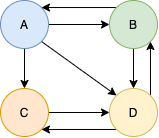

In [10]:
PATH = "/Users/colendi/Documents/myblog/images/posts/powerful-eigen-vectors/"
Image(filename = PATH + "pagerank_diagram.drawio.png", width=200, height=200)

In this setting, we can represent links on a page as a vector of numbers. Such that link structure on web page A can be written as: $\mathbf{L_A}=\begin{bmatrix}0&1/3&1/3&1/3\end{bmatrix}$. Each link in this vector is normalized by the total number of outward links from the page such that probability of getting to any page sums to 1. Lets write link vector for each of the web pages.

$$\mathbf{L_A}=\begin{bmatrix}0&1/3&1/3&1/3\end{bmatrix}\\\mathbf{L_B}=\begin{bmatrix}1/2&0&0&1/2\end{bmatrix}\\\mathbf{L_C}=\begin{bmatrix}0&0&0&1\end{bmatrix}\\\mathbf{L_D}=\begin{bmatrix}0&1/2&1/2&0\end{bmatrix}$$

Now that we have link vector for each of the web pages, let's create a link matrix $\mathbf{L}\in\mathbf{R^{4x4}}$, where respective web page link vectors are column vectors.

$$\mathbf{L}=\begin{bmatrix}0&1/2&0&0\\1/3&0&0&1/2\\1/3&0&0&1/2\\1/3&1/2&1&0\end{bmatrix}$$

Let's now inspect the matrix. As you can see this matrix represents probability of getting to any web page from any other. The matrix is referential meaning that in order to get the probability of being in A you need calculate how to get to B. You may also recognize that row vectors represent the probability of getting to any web page with respect to the origin i.e inward link probability.

How do we calculate rank using this matrix? For any webpage, we need to multiply rank of the pages pointing to it(inward link probability) with the rank of these pages. Let's calculate the rank for webpage A and then extend it to calculate all others. *As a side note, in machine learning in general you first model your problem/equation for only 1 instance and then extend it to all the other instances*. 

$$r=\sum\limits_{j=1}^{n}r_j*\mathbf{L_{A,j}}$$ ,where $r_j\in\mathbf{R}$ is rank of web page j pointing to A and $\mathbf{L_{A}}$ is the first row of the link matrix $\mathbf{L}$. In order to find ranks of all web pages(for all instances), we need to multiply Link matrix $\mathbf{L}$ with rank vector $\mathbf{r}$. Now we have

$$\mathbf{r} = \mathbf{L}*\mathbf{r}$$

Clearly we don't know $\mathbf{r}$ at the begining of our analysis therefore we will assume that ranks of web pages are equal which are normalized by the total number of web pages.$\mathbf{r_0}=\begin{bmatrix}1/4\\1/4\\1/4\\1/4\end{bmatrix}$. We can now start to calculate rank vector $\mathbf{r}$ of webpages. We will do it iteratively. At eacy step we are going to multiply link matrix $\mathbf{L}$ with rank vector $\mathbf{r}$ to find updated rank vector $\mathbf{r}$. The algorithm will finish when the rank vector $\mathbf{r}$ stops changing. That is

$$\mathbf{r^{i+1}} = \mathbf{L}*\mathbf{r^{i}}$$

Did you realize something about the equation above? Yes you are right, this is the equation of an eigenvector with an eigenvalue 1. Rank vector $\mathbf{r}$ that we are trying to find is the eigenvector of matrix $\mathbf{L}$. This is amazing! Let's find out the rank vector $\mathbf{r}$ by iteratively applying equation $\mathbf{r} = \mathbf{L}*\mathbf{r}$. 


In [31]:
import numpy as np
def find_solution(L,initial_r):
    r = initial_r
    index = 0
    while True:
        index += 1
        new_r = np.dot(L,r)
        if np.allclose(new_r,r,rtol=1e-02):
            break
        r = new_r
        print(r," rank vector at iteration %s\n"%index)
    return r

L = np.array([[0,1/2,0,0],[1/3,0,0,1/2],[1/3,0,0,1/2],[1/3,1/2,1,0]])
r = np.array([1/4,1/4,1/4,1/4])
print("Solution is: ",find_solution(L,r))



[0.125      0.20833333 0.20833333 0.45833333]  rank vector at iteration 1

[0.10416667 0.27083333 0.27083333 0.35416667]  rank vector at iteration 2

[0.13541667 0.21180556 0.21180556 0.44097222]  rank vector at iteration 3

[0.10590278 0.265625   0.265625   0.36284722]  rank vector at iteration 4

[0.1328125  0.21672454 0.21672454 0.43373843]  rank vector at iteration 5

[0.10836227 0.26114005 0.26114005 0.36935764]  rank vector at iteration 6

[0.13057002 0.22079958 0.22079958 0.42783083]  rank vector at iteration 7

[0.11039979 0.25743875 0.25743875 0.3747227 ]  rank vector at iteration 8

[0.12871938 0.22416128 0.22416128 0.42295806]  rank vector at iteration 9

[0.11208064 0.25438549 0.25438549 0.37914838]  rank vector at iteration 10

[0.12719274 0.2269344  0.2269344  0.41893845]  rank vector at iteration 11

[0.1134672  0.25186681 0.25186681 0.38279919]  rank vector at iteration 12

[0.1259334  0.22922199 0.22922199 0.41562261]  rank vector at iteration 13

[0.114611   0.2497891

Yeeyyyyy! We just found out that rankings for our pages for our mini model of internet. Our ranking is D > C=B > A. You can see how eigenvectors are central to an algorithm that we use pretty much everyday in our lives!

## Wrap Up

In this post, we saw that eigenvectors characterize matrices. Knowing eigenvectors of matrices, we can understand the kind of transformation matrices apply to any given input. Understanding eigenvectors is key to many ideas in machine learning! Eigenvectors are frequently used in many applications like [PageRank algorithm](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf) and [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis). With that, we have reached the end of this post, we have covered a lot and I really enjoyed going over a few important concepts with you. I hope that you enjoy the post as well :) If you have any questions about the post or data science in general, you can find me on [Linkedin](https://www.linkedin.com/in/koseoglubaran). I would highly appreciate to get any comment, question or just to have a chat about data science and topics around it with you! See you at the next one...